In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as spi
plt.style.use('seaborn-white')
from util import plot_diff_lambdas_distances
%matplotlib inline

In [22]:
# filename = 'data/diff_lambdas_redshifts3.csv'
# filename = 'data/diff_lambdas_const_rh7.csv'
# filename = 'data/half_analytical_const_m2.csv'
filename = 'data/half_analytical.csv'
# filename = 'data/half_analytical_throwaway.csv'
df = pd.read_csv(filename)

In [23]:
df[df.om_lambdas==0].count()
df.om_lambdas.nunique()
df = df.head(2500)

In [24]:
# zs = np.linspace(0.2, 1, 50)
# z_lens = []
# for z in zs:
#     z_lens.extend([z]*50)

# df['z_lens'] = z_lens
# df['comoving_lens'] = df.DL*(1+df.z_lens)
# df['raw_rs'] = df.rs - df.comoving_lens
# df['M'] = 1474e12 / 3.086e22
# df.to_csv('data/diff_lambdas_bigger_redshifts2.csv', index=False)

In [25]:
length_scale = 3.086e22
H_0 = 7.56e-27 * length_scale

preds_first_order = []
preds_frw = []
preds_ishak = []
for index, row in df.iterrows():
    M = row.M
    Lambda = 3*row.om_lambdas*H_0**2
    rho = (1-row.om_lambdas)*3*H_0**2/(8*np.pi)
    rh = (3*M/(4*np.pi*rho))**(1./3)
    A_frw = 4*M/(row.DL*row.theta) + 15*np.pi*M**2/4/(row.DL*row.theta)**2 + 401/12*M**3/(row.DL*row.theta)**3
    frw = row.comoving_lens/(A_frw/row.theta -1)
    
    A_ishak = 4*M/(row.DL*row.theta) + 15*np.pi*M**2/4/(row.DL*row.theta)**2 + 305/12*M**3/(row.DL*row.theta)**3 - Lambda*row.DL*row.theta*row.exit_rhs/3
    ishak = row.comoving_lens/(A_ishak/row.theta -1)
    
    A_first_order = 4*M/(row.DL*row.theta)
    first_order = row.comoving_lens/(A_first_order/row.theta - 1)
    
    preds_frw.append(frw)
    preds_ishak.append(ishak)
    preds_first_order.append(first_order)

df['preds_frw'] = preds_frw
df['preds_ishak'] = preds_ishak
# df['preds_first_order'] = preds_first_order

df['numerical'] = df.raw_rs/df.preds_frw
df['ishak'] = df.preds_ishak/df.preds_frw
# df['numerical first order'] = df.preds_frw / df.preds_first_order

In [26]:
df.head()

,DL,M,comoving_lens,exit_rhs,numerical_thetas,om_lambdas,raw_rs,rs,step,theta,z_lens,preds_frw,preds_ishak,numerical,ishak
0,622.435157,4.776410e-08,746.922188,1.005506,8.000000e-07,0.000000,1.560168,748.482357,1.000000e-09,8.000000e-07,0.2,1.560168,1.560168,1.0,1.0
1,623.866125,4.679907e-08,748.639350,1.005505,8.000000e-07,0.020204,1.599756,750.239106,1.000000e-09,8.000000e-07,0.2,1.599757,1.599757,1.0,1.0
2,625.309897,4.583404e-08,750.371876,1.005503,8.000000e-07,0.040408,1.641100,752.012976,1.000000e-09,8.000000e-07,0.2,1.641101,1.641101,1.0,1.0
3,626.766685,4.486901e-08,752.120022,1.005502,8.000000e-07,0.060612,1.684316,753.804339,1.000000e-09,8.000000e-07,0.2,1.684316,1.684316,1.0,1.0
4,628.236710,4.390398e-08,753.884052,1.005501,8.000000e-07,0.080816,1.729527,755.613579,1.000000e-09,8.000000e-07,0.2,1.729527,1.729527,1.0,1.0


df[(df.om_lambdas > 0.96) & (df.om_lambdas < 0.97)].numerical.values
df[(df.om_lambdas == 0.99)][['numerical', 'z_lens']].values

In [27]:
stats = df[['om_lambdas', 'numerical', 'ishak']].groupby('om_lambdas').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['numerical mean std'] = stats['numerical std']/np.sqrt(stats['numerical count'])
# stats['numerical first order mean std'] = stats['numerical first order std']/np.sqrt(stats['numerical first order count'])
stats['ishak mean std'] = stats['ishak std']/np.sqrt(stats['ishak count'])
stats.head()

,numerical mean,numerical std,numerical count,ishak mean,ishak std,ishak count,numerical mean std,ishak mean std
om_lambdas,,,,,,,,
0.000000,1.0,0.000001,50,1.0,3.333215e-09,50,1.681770e-07,4.713878e-10
0.020204,1.0,0.000001,50,1.0,2.545831e-09,50,2.034327e-07,3.600349e-10
0.040408,1.0,0.000001,50,1.0,1.726996e-09,50,2.025333e-07,2.442342e-10
0.060612,1.0,0.000001,50,1.0,9.184494e-10,50,1.813088e-07,1.298884e-10
0.080816,1.0,0.000001,50,1.0,5.824426e-10,50,2.053075e-07,8.236982e-11


In [28]:
stats['numerical mean'] = stats['numerical mean'] - 1
stats['ishak mean'] = stats['ishak mean'] - 1
# stats['numerical first order mean'] = stats['numerical first order mean'] - 1

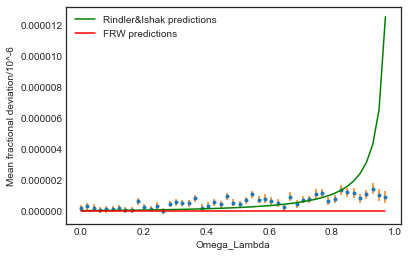

In [29]:
scale = 1
stats = stats.head(49)
plt.plot(stats.index, stats['numerical mean']/scale, '.', label='__nolegend__')
# plt.plot(stats.index, stats['numerical first order mean']/scale, 'b-', label='with second order corrections')
plt.errorbar(stats.index, stats['numerical mean']/scale, yerr=stats['numerical mean std']/scale, linestyle='none', label='__nolegend__')
plt.xlabel('Omega_Lambda')
plt.ylabel('Mean fractional deviation/10^-6')
plt.plot(stats.index, stats['ishak mean']/scale, 'g-', label='Rindler&Ishak predictions')
plt.plot(stats.index, [0/scale]*len(stats.index), 'r-', label='FRW predictions')
# plt.ylim((-0.0008, 0.0008))
plt.legend()
# plt.savefig('images/half_analytical.png',  dpi=400)

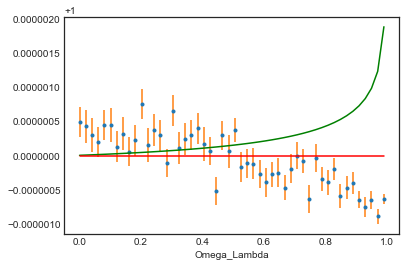

In [12]:
plot_diff_lambdas_distances('data/half_analytical_const_m.csv', plot_ishak=True)

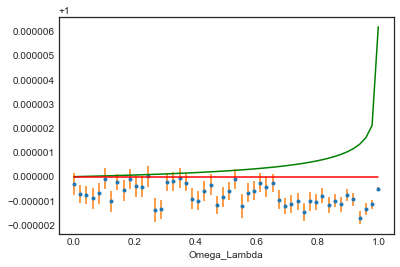

In [13]:
plot_diff_lambdas_distances('data/half_analytical_const_m2.csv', plot_ishak=True)

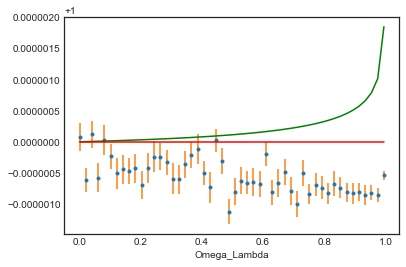

In [21]:
plot_diff_lambdas_distances('data/half_analytical_const_m3.csv', plot_ishak=True)

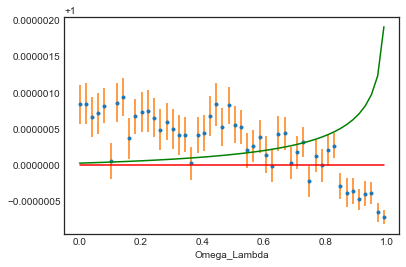

In [16]:
plot_diff_lambdas_distances('data/half_analytical_const_lensz.csv', plot_ishak=True)

p_frw/p_ishak:  40.9963809806
p_ishak/p_frw:  0.0243923969892


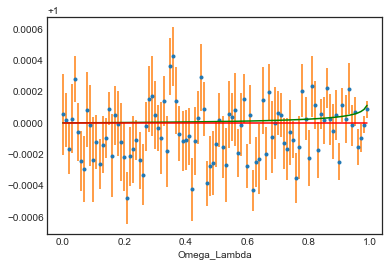

In [29]:
plot_diff_lambdas_distances('data/diff_lambdas_redshifts3.csv')

p_frw/p_ishak:  9.43661204464e+22
p_ishak/p_frw:  1.05970235427e-23


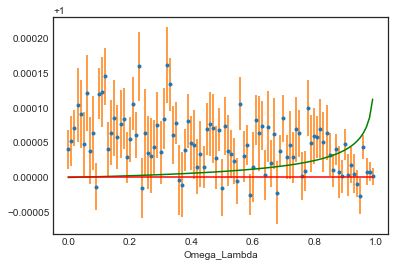

In [25]:
plot_diff_lambdas_distances('data/diff_lambdas_redshifts2.csv')

p_frw/p_ishak:  12.543252532
p_ishak/p_frw:  0.0797241383328


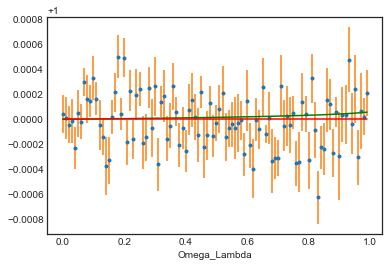

In [11]:
plot_diff_lambdas_distances('data/diff_lambdas_const_rh5.csv')

p_frw/p_ishak:  0.00720137985504
p_ishak/p_frw:  138.862276415


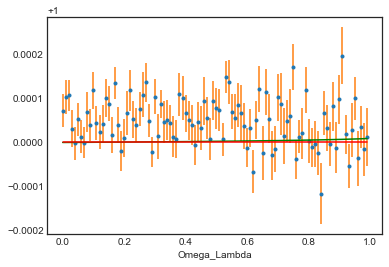

In [27]:
plot_diff_lambdas_distances('data/diff_lambdas_const_rh6.csv') # higher mass

p_frw/p_ishak:  nan
p_ishak/p_frw:  nan


D:\GIT\msciproject\util.py:53: RuntimeWarning: invalid value encountered in double_scalars
  print("p_frw/p_ishak: ", p_frw/p_ishak)
D:\GIT\msciproject\util.py:54: RuntimeWarning: invalid value encountered in double_scalars
  print("p_ishak/p_frw: ", p_ishak/p_frw)


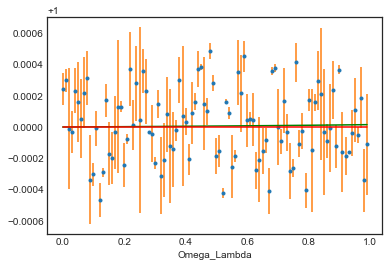

In [26]:
plot_diff_lambdas_distances('data/diff_lambdas_const_rh7.csv') # lower mass

In [13]:
# stats2 = df[['om_lambdas', 'raw_rs', 'preds_frw', 'preds_ishak']].groupby('om_lambdas').agg(['mean', 'std', 'count'])
# stats2.columns = [' '.join(col).strip() for col in stats2.columns.values]
# stats2['raw_rs mean std'] = stats2['raw_rs std']/np.sqrt(stats2['raw_rs count'])
# stats2

In [14]:
# scale = stats2['preds_frw mean']
# # scale = 1
# plt.plot(stats2.index, stats2['raw_rs mean']/scale, '.')
# plt.errorbar(stats2.index, stats2['raw_rs mean']/scale, yerr=stats2['raw_rs mean std']/scale, linestyle='none')
# plt.xlabel('Omega_Lambda')
# # plt.ylabel('Mean fractional deviation/10^-5')
# plt.plot(stats2.index, stats2['preds_frw mean']/scale, 'r-')
# plt.plot(stats2.index, stats2['preds_ishak mean']/scale, 'g-')

In [15]:
# chisquared_frw = (stats2['raw_rs mean'] - stats2['preds_frw mean'])**2/(stats2['raw_rs mean std'])**2
# chisquared_ishak = (stats2['raw_rs mean'] - stats2['preds_ishak mean'])**2/(stats2['raw_rs mean std'])**2
# p_frw = np.exp(-chisquared_frw.sum()/2)
# p_ishak = np.exp(-chisquared_ishak.sum()/2)
# print(p_frw/p_ishak)
# print(chisquared_frw)
# print(chisquared_ishak)